# Basic vol surface calibration from an observable market of vanilla European option using SVI method ([Arbitrage-free SVI volatility surfaces](https://arxiv.org/pdf/1204.0646.pdf))

In [1]:
from _LIB_Implied_Vol import *

## Store Vol constraints by Eq tickers

In [2]:
AAPL_stock = EqStock( 100, "AAPL" )

In [3]:
Eq_vol_mkt = {
"AAPL" :
[
EqVolConstraint( 
    {
    "underlyer"      : AAPL_stock,
    "maturity"       : 1, # no support for date yet, use double
    "denominated"    : "USD",
    "payoff"         : EuropeanCall( strike = 100 ),
    "CSA"            : "USD-Libor"
}, 9, "price" ),
    
EqVolConstraint( {
    "underlyer"      : AAPL_stock,
    "maturity"       : 1, # no support for date yet, use double
    "denominated"    : "USD",
    "payoff"         : EuropeanCall( strike = 110 ),
    "CSA"            : "USD-Libor"
}, 4, "price" ),
    
EqVolConstraint( {
    "underlyer"      : AAPL_stock,
    "maturity"       : 1, # no support for date yet, use double
    "denominated"    : "USD",
    "payoff"         : EuropeanCall( strike = 120 ),
    "CSA"            : "USD-Libor"
}, 2, "price" ),
    
EqVolConstraint( {
    "underlyer"      : AAPL_stock,
    "maturity"       : 1, # no support for date yet, use double
    "denominated"    : "USD",
    "payoff"         : EuropeanCall( strike = 150 ),
    "CSA"            : "USD-Libor"
}, 0.5, "price" ),
    
EqVolConstraint( {
    "underlyer"      : AAPL_stock,
    "maturity"       : 1, # no support for date yet, use double
    "denominated"    : "USD",
    "payoff"         : EuropeanCall( strike = 90 ),
    "CSA"            : "USD-Libor"
}, 16, "price" ),
    
EqVolConstraint( {
    "underlyer"      : AAPL_stock,
    "maturity"       : 1, # no support for date yet, use double
    "denominated"    : "USD",
    "payoff"         : EuropeanCall( strike = 80 ),
    "CSA"            : "USD-Libor"
}, 25, "price" ),
    
]

}

In [4]:
Mkt = EqVolMkt( Eq_vol_mkt )

In [5]:
#vols = []
#for mkt_instrument in Eq_vol_mkt_map[ AAPL_stock.ticker ]:
#    vols.append( mkt_instrument.implied_vol )
#    print( mkt_instrument.is_ATM )
#print( vols )

## Plot vol surface

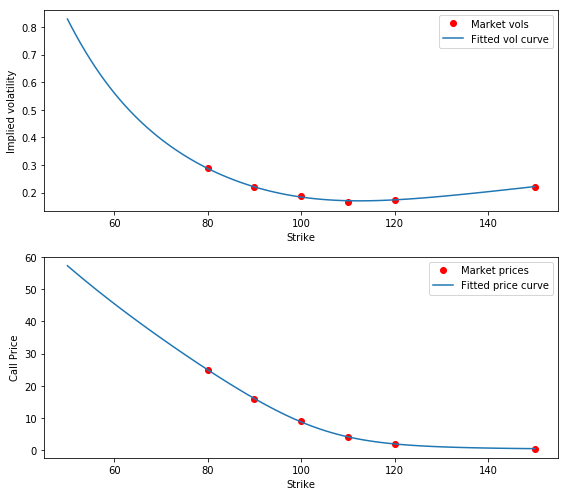

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5209
b=3.4342
rho=-0.9104
m=-0.7645
sigma=0.3871


In [6]:
vol_curve = EqVolCurve( AAPL_stock, "SVI", Mkt = Mkt )
vol_curve.curve_fit()

vol_curve.plot()

## Impact of vol parametrization

In [7]:
vol_curve = EqVolCurve( AAPL_stock, "SVI", Mkt = Mkt )

a : parallel shift of ATM vol

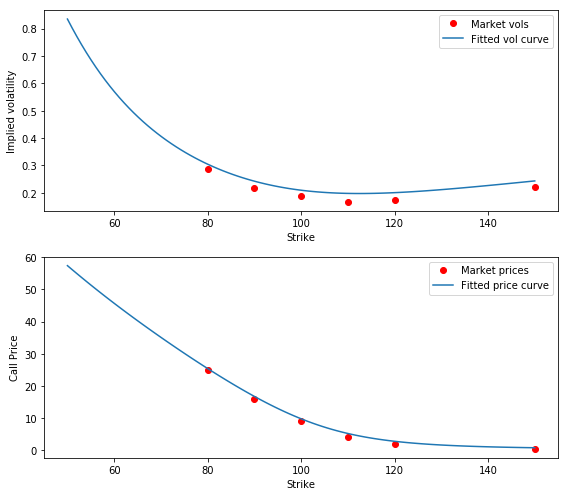

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5109
b=3.4342
rho=-0.9104
m=-0.7645
sigma=0.3871


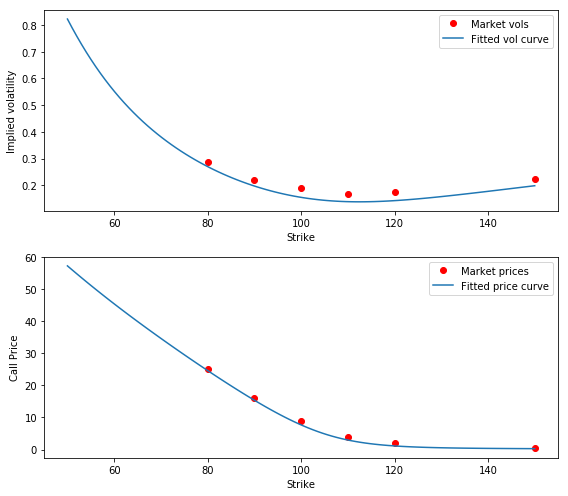

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5309
b=3.4342
rho=-0.9104
m=-0.7645
sigma=0.3871


In [8]:
vol_curve.curve_fit(force_fit = True)
vol_curve.parms[0] += 0.01
vol_curve.plot()

vol_curve.curve_fit(force_fit = True)
vol_curve.parms[0] -= 0.01
vol_curve.plot()

b : controls the slope of both call and put wings

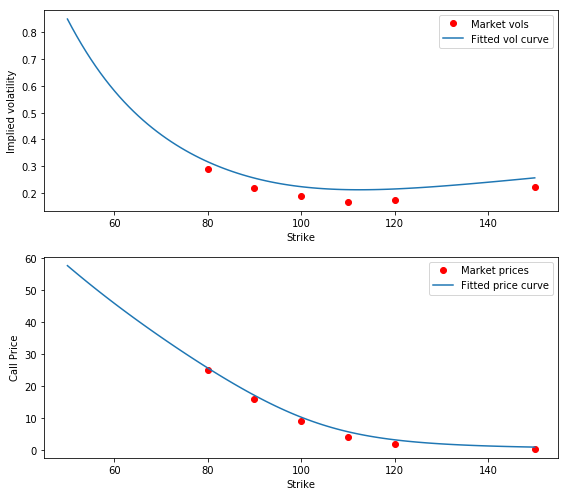

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5209
b=3.5342
rho=-0.9104
m=-0.7645
sigma=0.3871


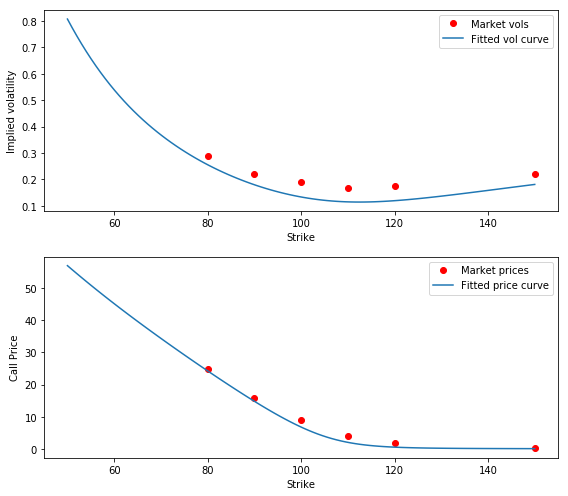

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5209
b=3.3342
rho=-0.9104
m=-0.7645
sigma=0.3871


In [9]:
vol_curve.curve_fit(force_fit = True)
vol_curve.parms[1] += 0.1
vol_curve.plot()

vol_curve.curve_fit(force_fit = True)
vol_curve.parms[1] -= 0.1
vol_curve.plot()

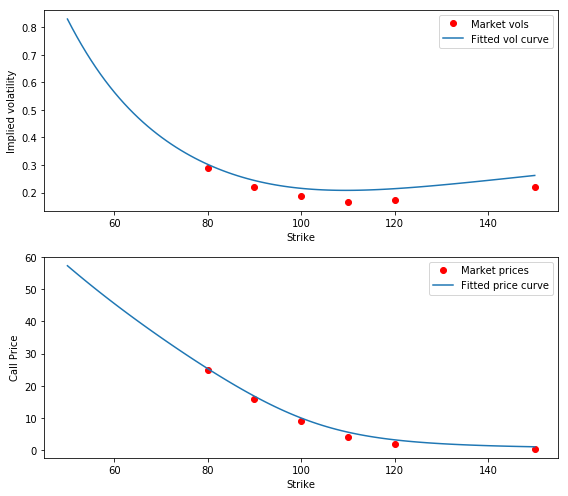

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5209
b=3.4342
rho=-0.9054
m=-0.7645
sigma=0.3871


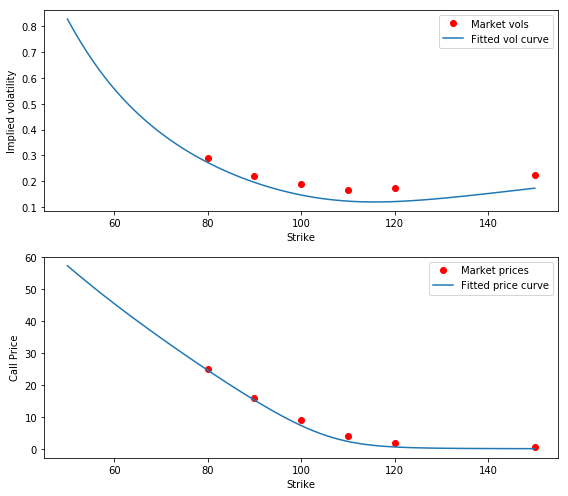

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5209
b=3.4342
rho=-0.9154
m=-0.7645
sigma=0.3871


In [10]:
vol_curve.curve_fit(force_fit = True)
vol_curve.parms[2] += 0.005
vol_curve.plot()

vol_curve.curve_fit(force_fit = True)
vol_curve.parms[2] -= 0.005
vol_curve.plot()

m : horizontal translation of the smile along the strike axis

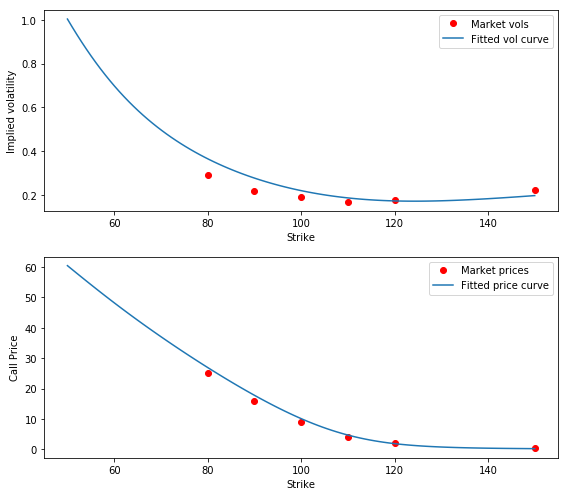

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5209
b=3.4342
rho=-0.9104
m=-0.6645
sigma=0.3871


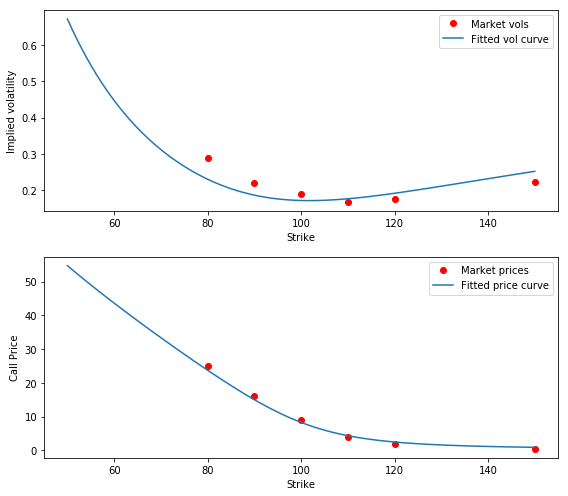

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5209
b=3.4342
rho=-0.9104
m=-0.8645
sigma=0.3871


In [11]:
vol_curve.curve_fit(force_fit = True)
vol_curve.parms[3] += 0.1
vol_curve.plot()

vol_curve.curve_fit(force_fit = True)
vol_curve.parms[3] -= 0.1
vol_curve.plot()

simga : controls ATM curvature

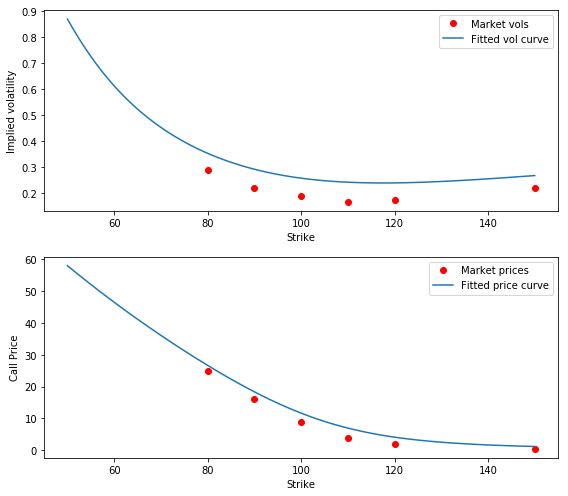

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5209
b=3.4342
rho=-0.9104
m=-0.7645
sigma=0.4071


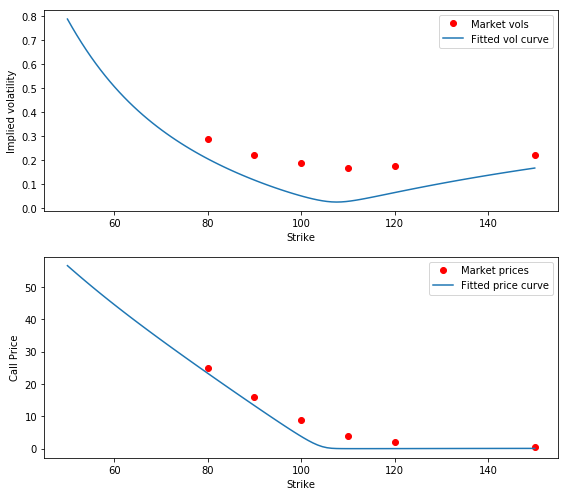

w(k) = a + b * ( rho * ( k - m ) + sqrt( ( k - m ) ^ 2 + sigma ^ 2 ) )
k : log-moneyness, t : slice (maturity), w(k,t)=sigma_bs(k,t)^2 * t (total variance)
a=-0.5209
b=3.4342
rho=-0.9104
m=-0.7645
sigma=0.3671


In [12]:
vol_curve.curve_fit(force_fit = True)
vol_curve.parms[4] += 0.02
vol_curve.plot()

vol_curve.curve_fit(force_fit = True)
vol_curve.parms[4] -= 0.02
vol_curve.plot()

## Test implied vol/price conversion

In [13]:
AAPL_stock = EqStock( 100, "AAPL" )
DT = {
    "underlyer"      : AAPL_stock,
    "maturity"       : 1, # no support for date yet
    "denominated"    : "USD",
    "payoff"         : EuropeanCall( strike = 95 ),
    "CSA"            : "USD-Libor"
}

AAPL_eq_option = EqOption( DT, Mkt = Mkt )

In [14]:
# test that price -> vol and vol -> price are consistent
Vol = EqVol( DT )
tol_vol = 1e-12
for vol in [0.2, 0.5, 0.8, 1.2]:
    vol_calc = Vol.vol_from_price( Vol.price_from_vol( vol ) )
    if np.abs( vol_calc - vol ) > tol_vol:
        print('Vol->Price->Vol failed for vol={:.2f}'.format(vol))
        print('Expected: {:.6f}'.format(vol))
        print('Received: {:.6f}'.format(vol_calc))
    else:
        print('Vol->Price->Vol succeeded for vol={:.2f}'.format(vol))

tol_price = 1e-8
for price in [8, 10, 20, 50]:
    price_calc = Vol.price_from_vol( Vol.vol_from_price( price ) )
    if np.abs( price_calc - price ) > tol_price:
        print('Vol->Price->Vol failed for price={:.2f}'.format(price))
        print('Expected: {:.6f}'.format(price))
        print('Received: {:.6f}'.format(price_calc))
    else:
        print('Price->Vol->Price succeeded for price={:.2f}'.format(price))

Vol->Price->Vol succeeded for vol=0.20
Vol->Price->Vol succeeded for vol=0.50
Vol->Price->Vol succeeded for vol=0.80
Vol->Price->Vol succeeded for vol=1.20
Price->Vol->Price succeeded for price=8.00
Price->Vol->Price succeeded for price=10.00
Price->Vol->Price succeeded for price=20.00
Price->Vol->Price succeeded for price=50.00


## Price an out-of-market option

In [15]:
AAPL_stock = EqStock( 100, "AAPL" )
DT = {
    "underlyer"      : AAPL_stock,
    "maturity"       : 1, # no support for date yet
    "denominated"    : "USD",
    "payoff"         : EuropeanCall( strike = 85 ),
    "CSA"            : "USD-Libor"
}

AAPL_eq_option = EqOption( DT, Mkt = Mkt )

In [16]:
AAPL_eq_option.price()

20.38332401550717